In [3]:
def dfs():
  while stack: #stack에 아무것도 없을 때 까지
    x = stack.pop()
    for each in adj[x]:
      if visited[each] == 0:
        visited[each] = 1
        stack.append(each)

In [1]:
import sys
# V: # of vertex, E: # of edge
V, E = map(int, sys.stdin.readline().split())
# standard line. readline-한줄 씩 읽음, split-space를 기준으로 분리, 
# map(int,) 정수로 변환
# sys.stdin.readline() 얘가 문자열 리스트로 저장이 될 것 ex.['5','6']
# 얘가 V=5, E=6으로 변경 됨
# sys.stdin.readline() 얘가 처리 속도가 빠름 input 함수 보다
adj = [[] for _ in range(V+1)]
visited = [0 for _ in range(V+1)]
stack = []

# 모든 edge를 리스트에 저장
for _ in range(1,E+1):
  x, y = map(int,sys.stdin.readline().split(" "))
  adj[x].append(y)
  adj[y].append(x)

print(adj)

# 모든 vertex를 확인하기
count = 0
for i in range(1,V+1):
  if visited[i] == 0:
    count += 1
    stack.append(i)
    dfs()

print(count)

ValueError: ignored

In [5]:
from collections import deque

def bfs_f(data,start):
  queue = deque([start])
  bfs_visited[start] = True
  while queue:
    n = queue.popleft()
    print(n, end= ' -> ')
    for i in data[n]:
      if not bfs_visited[i]:
        queue.append(i)
        bfs_visited[i] = True

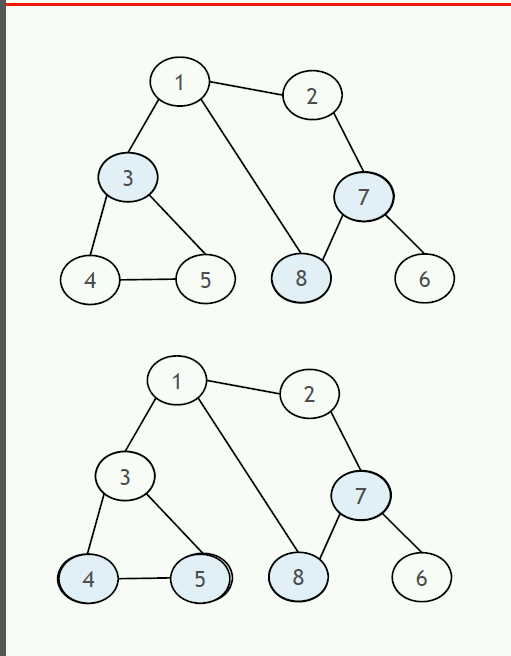

In [6]:
if __name__ == "__main__":
  data = [[],[2,3,8], #1번노드의 인접노드
          [1,7], #2번노드의 인접노드
          [1,4,5], #3번노드의 인접노드
          [3,5],
          [3,4],
          [7],
          [2,6,8],
          [1,7],]
  bfs_visited = [False]*len(data)
  bfs_f(data, 1)

1 -> 2 -> 3 -> 8 -> 7 -> 4 -> 5 -> 6 -> 

# 이진탐색

In [7]:
def binary_search(left, right, k):
  if left > right: return None
  middle = (left + right)//2
  if binary[middle] == k: return middle
  if binary[middle] > k:
    binary_search(left, middle-1, k) #중간인덱스 앞부분 탐색
  else:
    binary_seasrch(middle+1, right, k) #중간인덱스 뒷부분 탐색

In [53]:
class Node:
  def __init__(self,key,value,left=None,right=None):
    self.key = key
    self.value = value
    self.left = left
    self.right = right

class BST:
  def __init__(self):
    self.root = None
  
  def put_value(self,r,key,value):
    if r == None:
      return Node(key,value)
    
    if r.key > key:
      r.left = self.put_value(r.left,key,value)
    
    elif r.key < key:
      r.right = self.put_value(r.right,key,value)
    else:
      r.value = value
    
    return r
  
  def put(self, key,value):
    self.root = self.put_value(self.root, key, value)
  
  # item 대신 key, n 대신 r로 변환
  def preorder(self, r):
    if r.key != None:
      print(f'[{str(r.key),str(r.value)}],', end='')
      if r.left:
        self.preorder(r.left)
      if r.right:
        self.preorder(r.right)
  
  def inorder(self,r):
    if r.key !=None:
      if r.left:
        self.inorder(r.left)
      print(f'[{str(r.key),str(r.value)}],' ,end='')

    if r.right:
      self.inorder(r.right)

  def postorder(self,r):
    if r.key !=None:
      if r.left:
        self.postorder(r.left)
      if r.right:
        self.postorder(r.right)
      print(f'[{str(r.key),str(r.value)}],', end='')

    #재귀함수
  def get(self, k):
    return self.get_value(self.root, k)
  
  def get_value(self, r, k):
    if r == None:
      return None
    if r.key > k:
      return self.get_value(r.left,k)
    elif r.key < k:
      return self.get_value(r.right,k)
    else:
      return r
  

  #최솟값 탐색
  def min(self):
    if self.root == None:
      return None
    else:
      return self.minimum(self.root)
  
  def minimum(self,r):
    if r.left == None:
      return r
    return self.minimum(r.left)

In [54]:
if __name__ == '__main__':
  bs = BST()
  data = [[50,'apple'],[60,'melon'],[20,'lime'],[10,'kiwi'],\
      [40,'peach'],[25,'orange'],[15,'grape'],[80,'lemon'],\
      [70,'cherry'],[5,'pear'],[35,'mango'],[45,'plum']]

  for i in range(len(data)):
    bs.put(data[i][0],data[i][1])
  print(bs.root.key)
  bs.inorder(bs.root)

  print()
  search = int(input('찾고자 하는 key 값 :'))
  result = bs.get(search)
  
  if result != None:
    print(f'{result.key} and {result.value} 를 찾음')
  else:
    print(f'찾는 값이 없음')
  
  print('\nMinimum of bs')
  min_obj = bs.min()
  print(f'min_key: {min_obj.key}, min_value: {min_obj.value}')

50
[('5', 'pear')],[('10', 'kiwi')],[('15', 'grape')],[('20', 'lime')],[('25', 'orange')],[('35', 'mango')],[('40', 'peach')],[('45', 'plum')],[('50', 'apple')],[('60', 'melon')],[('70', 'cherry')],[('80', 'lemon')],
찾고자 하는 key 값 :25
25 and orange 를 찾음

Minimum of bs
min_key: 5, min_value: pear
